# **Prediction of Influence of social media advertisements on sales**

---



---



1. Problem Defination


> To perform EDA & examine Various machine learning models to be worked out to determine the prediction that wether the item got purchased from the ad



In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Social_Network_Ads.csv to Social_Network_Ads.csv
User uploaded file "Social_Network_Ads.csv" with length 4903 bytes


## **Loading the data**

In [ ]:
df= pd.read_csv("/content/Social_Network_Ads.csv")

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Cheaking for any missing values

In [ ]:
df.info()

# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Description of data

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Analysing Various relations between the all columns---Visual EDA 

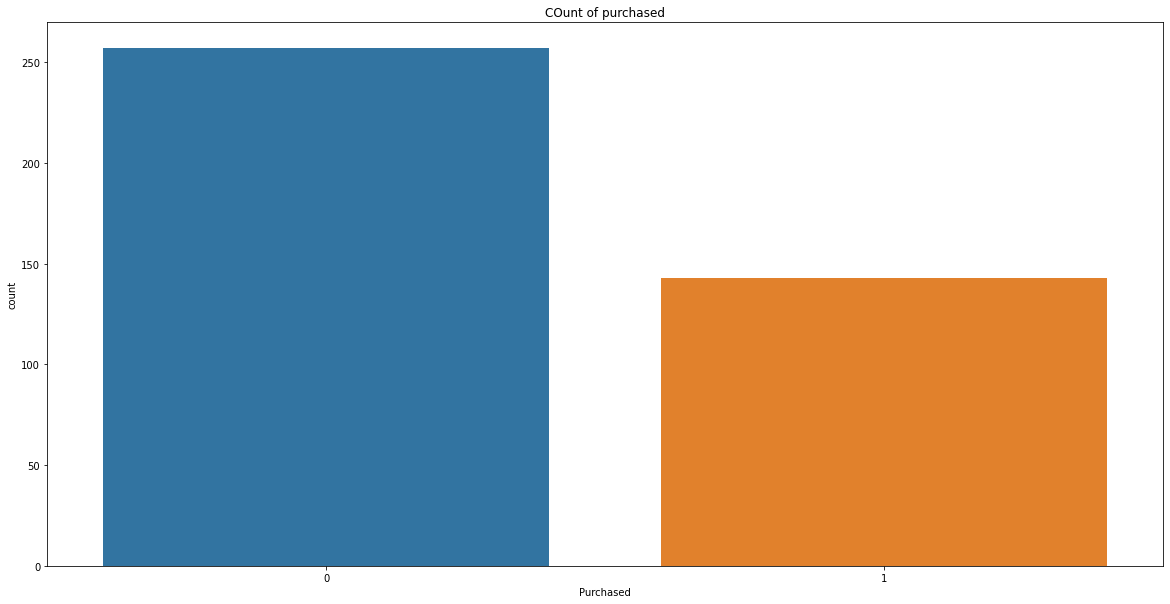

In [ ]:
plt.figure(figsize=(20,10))
plt.title("COunt of purchased")
sns.countplot(data=df, x='Purchased')
plt.show()


## There is little imbalance in the data

# Plots of  Different parameters 

## Histogram of Age

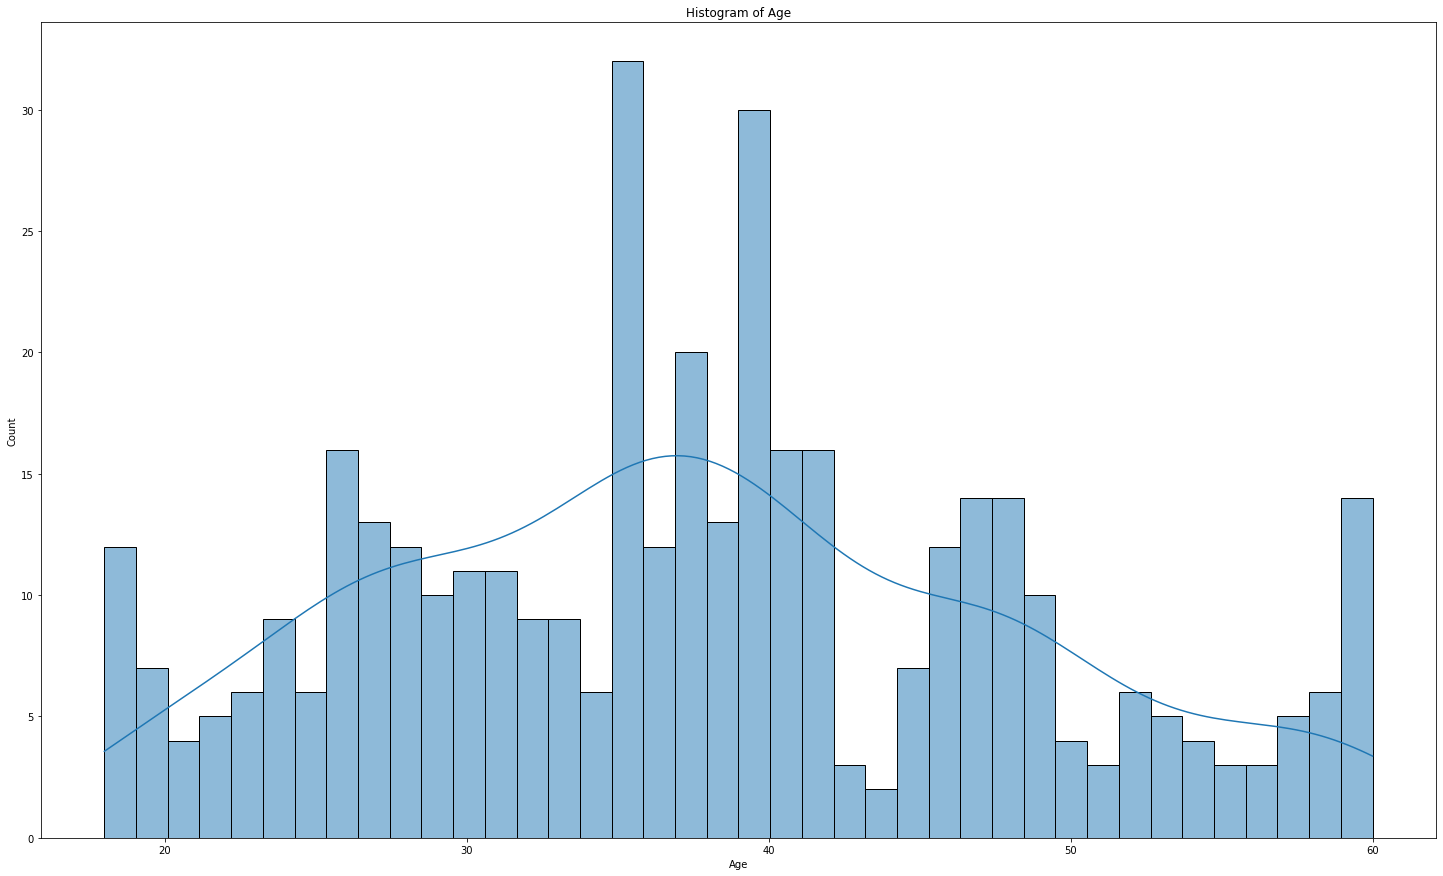

In [ ]:
plt.figure(figsize=(25,15))
plt.title('Histogram of Age')
sns.histplot(data=df, x= 'Age', bins=40, kde=True)

## Histogram of Estimated salary

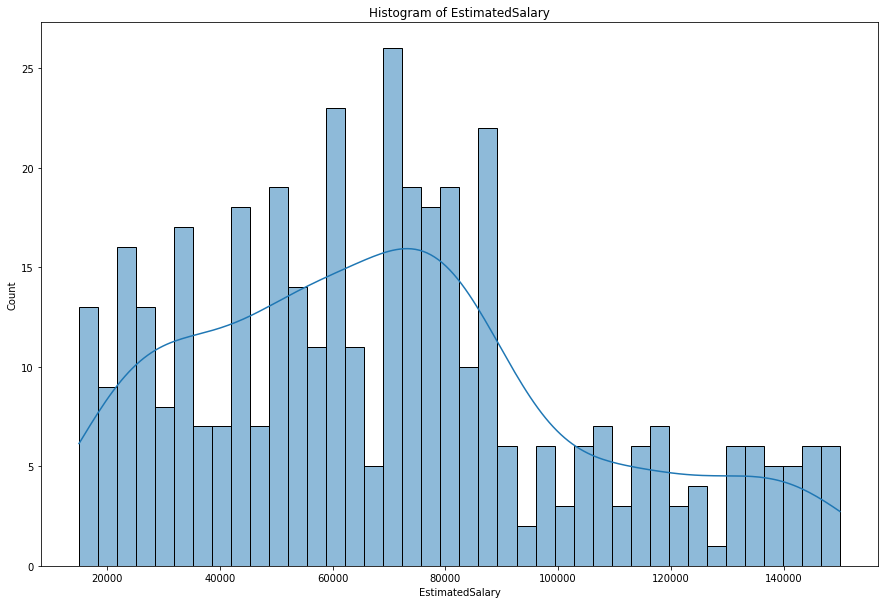

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Histogram of EstimatedSalary')
sns.histplot(data=df, x= 'EstimatedSalary', bins=40, kde=True)

# Scatter Plot of Estimated Salary Vs Age

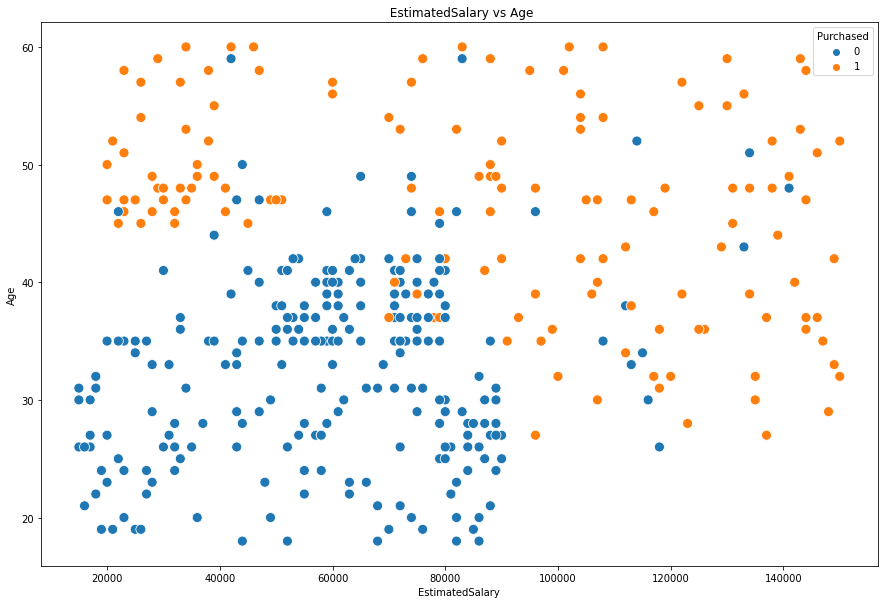

In [ ]:
plt.figure(figsize=(15,10))
plt.title(' EstimatedSalary vs Age')
sns.scatterplot(data=df, x='EstimatedSalary' , y='Age', hue='Purchased',s=100)

# Correlation plot

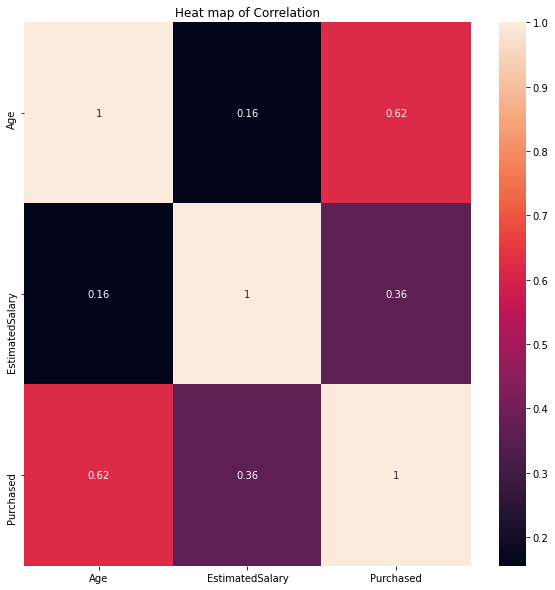

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Heat map of Correlation')
sns.heatmap(data=df.corr(), annot= True)

# ** Model Creation Process---Features and Labels seperation and Spliting of Data**

In [ ]:
X = df.drop('Purchased', axis=1) # Features
y = df['Purchased'] # Label

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scalar = StandardScaler()

X_train= scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Model Import

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier,XGBRFClassifier

## A function for running model and getting respective score 

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
          'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss')}

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
model_scores.sort_values('Score')

,Score
DecisionTreeClassifier,0.8375
LogisticRegression,0.8625
GradientBoostingClassifier,0.8625
RandomForestClassifier,0.8875
AdaBoostClassifier,0.8875
KNeighborsClassifier,0.9125
XGBClassifier,0.9125
XGBRFClassifier,0.9125
SVC,0.9250


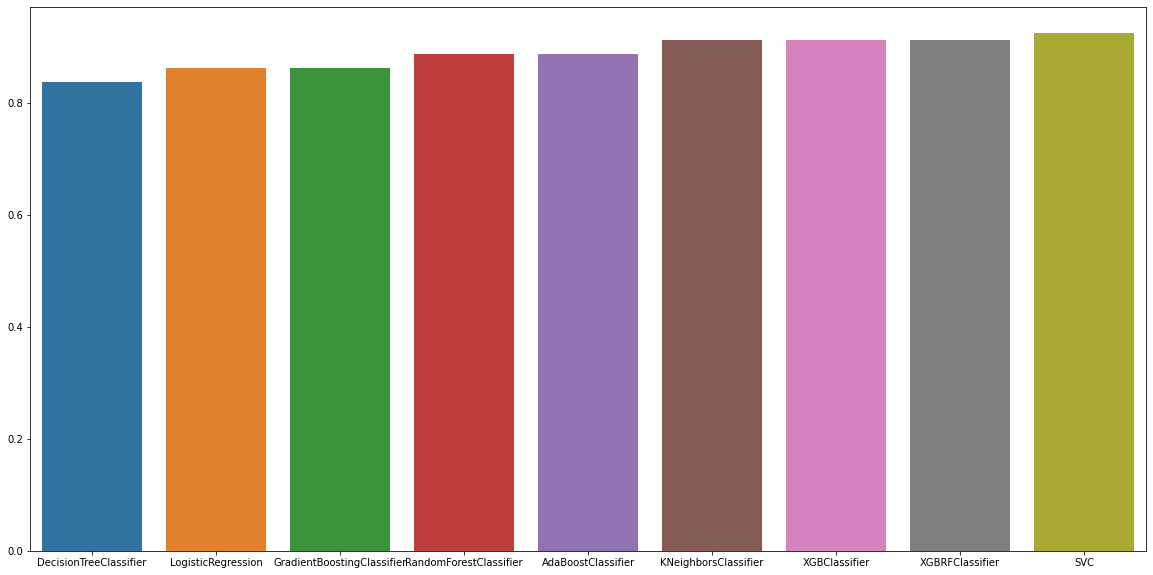

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data= model_scores.sort_values('Score').T)
#plt.title('Model Prediction Scores')

We can choose some models for further analysis in order to improve scores


1. KNeighborsClassifier 0.9125

2. KNeighborsClassifier 0.9125

3. XGBRFClassifier 0.9125
4. SVC 0.9250



Hyperparametertuning by Random Search Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                     cv=5,
                                     n_iter=20,
                                     verbose=1)
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [ ]:
params = {'KNeighborsClassifier' : {'n_neighbors': np.arange(1,100,10)},
          'XGBClassifier': {'learning_rate': np.linspace(0,1,20),
                            'gamma': [0,2,4,10,20,50],
                            'max_depth': [2,3,6,10,20],
                            'lambda': [0,1],
                            'alpha' : [0,0.1,0.2,0.5,0.8,1],
                            },
          'XGBRFClassifier': {'learning_rate': np.linspace(0,1,20),
                              'max_depth': [2,3,6,10,20],
                              },
          'SVC' : {'C': [0.1,0.5,1, 10,100,500], 
                   'kernel':['linear', 'poly', 'rbf','sigmoid'],
                   'gamma':['scale','auto'],
                   'degree':[2,3,4,5,6,7]}
          }
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
         'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss'),
         'SVC': SVC()
         }

In [ ]:
model_rs_scores_1, model_rs_best_param_1 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [ ]:
model_rs_scores_1

{'KNeighborsClassifier': 0.925,
 'SVC': 0.9375,
 'XGBClassifier': 0.9125,
 'XGBRFClassifier': 0.9125}

In [ ]:
model_rs_best_param_1

{'KNeighborsClassifier': {'n_neighbors': 11},
 'SVC': {'C': 0.5, 'degree': 7, 'gamma': 'scale', 'kernel': 'rbf'},
 'XGBClassifier': {'alpha': 0,
  'gamma': 20,
  'lambda': 0,
  'learning_rate': 0.631578947368421,
  'max_depth': 2},
 'XGBRFClassifier': {'learning_rate': 0.47368421052631576, 'max_depth': 2}}

RandomSearch CV --Second Iteration

In [ ]:
params = {'KNeighborsClassifier' : {'n_neighbors': np.arange(1,15)},
          'XGBClassifier': {'learning_rate': [0.631578947368421],
                            'gamma': [15,20,25],
                            'max_depth': [2],
                            'lambda': [0,1],
                            'alpha' : [0],
                            },
          'XGBRFClassifier': {'learning_rate': [0.47368421052631576],
                              'max_depth': [2],
                              },
          'SVC' : {'C': [0.3,0.4,0.5,0.6,0.7], 
                   'kernel':['rbf'],
                   'gamma':['scale'],
                   'degree':[7,8,9,10,15,20]}
          }
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
         'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss'),
         'SVC': SVC()
         }

In [ ]:
model_rs_scores_2, model_rs_best_param_2 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [ ]:
model_rs_scores_2

{'KNeighborsClassifier': 0.9375,
 'SVC': 0.925,
 'XGBClassifier': 0.9125,
 'XGBRFClassifier': 0.9125}

In [ ]:
model_rs_best_param_2

{'KNeighborsClassifier': {'n_neighbors': 9},
 'SVC': {'C': 0.6, 'degree': 20, 'gamma': 'scale', 'kernel': 'rbf'},
 'XGBClassifier': {'alpha': 0,
  'gamma': 15,
  'lambda': 0,
  'learning_rate': 0.631578947368421,
  'max_depth': 2},
 'XGBRFClassifier': {'learning_rate': 0.47368421052631576, 'max_depth': 2}}

Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

In [ ]:
final_model= KNeighborsClassifier( n_neighbors=9)

final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

Classification Reports

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



Cofusion Matrix

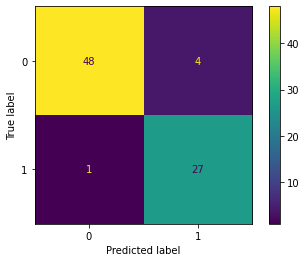

In [ ]:
plot_confusion_matrix(final_model,X_test,y_test)

Roc Curve

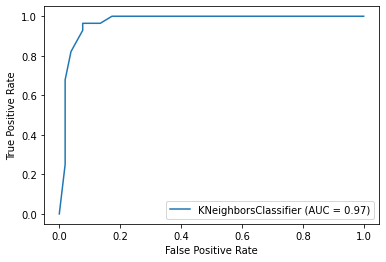

In [ ]:
plot_roc_curve(final_model,X_test,y_test)

# Model Performing well giving Accuracy Score 97%